In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import cvxpy as cp

print("imported all packages")

imported all packages


In [3]:
airports100=pd.read_csv('airports100.csv')
demandMat=pd.read_csv('demandMatrix.csv',header=None).to_numpy()
lengthMat=pd.read_csv('lengthMatrix.csv',header=None).to_numpy()
usaOutline=pd.read_csv('usaOutline.csv',header=None)
x=airports100['Longitude']
y=airports100['Latitude']
mylabels=airports100['Airport']

38   STL


Text(0.5, 1.0, 'Hub selected to minimize total passenger-miles')

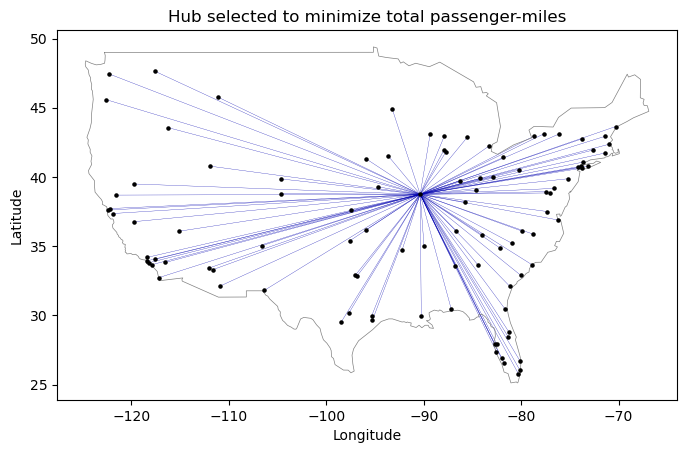

In [7]:
#Single-objective hub selection

#select smallest entry in LD1. This will give us minimum-passenger-miles hub:
#can modify this based on what we want to optimize for:
hubindex=np.argmin(lengthMat@demandMat@np.ones((100,1)))

#print the resulting node:
print(hubindex," ", mylabels[hubindex])

fig1, plot1 = plt.subplots()

for i in range(100):
    plt.plot((x[i], x[hubindex]),(y[i], y[hubindex]),'#0000b0',linewidth=0.2)

plot1.plot(usaOutline.iloc[0,:],usaOutline.iloc[1,:],color='grey',linewidth=0.5,zorder=2)
plot1.scatter(x,y,s=5,color='k',edgecolors='k',zorder=3)

fig1.set_size_inches(8,4.8)
plot1.set_xlabel('Longitude')
plot1.set_ylabel('Latitude')
plot1.set_title('Hub selected to minimize total passenger-miles')

[ 0.  1.  4. 29. 38. 68.]
[0. 1. 2. 3. 4. 5.]


Text(160, 30, 'SDF')

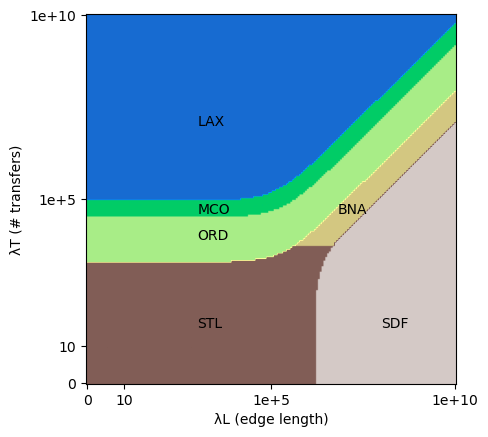

In [12]:
#Generate set of multi-objective hub selection solutions

D=demandMat
L=lengthMat
ones=np.ones((100,1))
N=201

indices=np.zeros((N,N)) #matrix that will contain solution for each pair of lambda values
ival=10**np.linspace(0,10,N) #lambda values spaced logarithmically evenly
jval=10**np.linspace(0,10,N) #lambda values spaced logarithmically evenly
for i in range(N):
    for j in range(N):
        lamL=ival[i]
        lamT=jval[j]
        indices[i,j]=np.argmin(L@D@ones+lamL*L@ones-lamT*D@ones) #solves simpliified optimization problem
        #and outputs index for optimal airport to be selected as hub
        

#make indices matrix evenly spaced, for plotting
print(np.unique(indices))
indicesplot=np.ones((N,N))
for i in range(N):
    for j in range(N):
        indicesplot[i,j]=np.where(np.unique(indices)==indices[i,j])[0][0]
print(np.unique(indicesplot))

#create plot
fig1, plot1 = plt.subplots()
plot1.imshow(indicesplot.T,origin='lower',interpolation=None,cmap='terrain',vmin=-0.5,vmax=5.5)
plot1.xaxis.tick_bottom()
plt.xticks(np.array([0,20,100,200]),["0","10","1e+5","1e+10"])
plt.yticks(np.array([0,20,100,200]),["0","10","1e+5","1e+10"])

plot1.set_xlabel('λL (edge length)')
plot1.set_ylabel('λT (# transfers)')

plot1.annotate('LAX',(60,140))
plot1.annotate('STL',(60,30))
plot1.annotate('ORD',(60,78))
plot1.annotate('MCO',(60,92))
plot1.annotate('BNA',(136,92))
plot1.annotate('SDF',(160,30))


In [ ]:
#hub creation: basic setup

d1=D@np.ones((100,1))
dtotal = sum(sum(D))*0.5
xcoord=airports100['Longitude'] #airport x coordinates
ycoord=airports100['Latitude'] #airport y coordinates

#preparation: constructing m and Lprime
Lprime=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        Lprime[i,j]=np.linalg.norm([(xcoord[i]-xcoord[j]),(ycoord[i]-ycoord[j])])
mAll=np.divide(L,Lprime)
m=np.nanmean(mAll)
Lprime=Lprime*m

In [35]:
#hub creation: solver using cvxpy

lamL=1000 #select desired value
lamT=1000 #select desired value

x=cp.Variable(2)

#build objective function
objective = lamT*dtotal
for i in range(100):
    objective = objective + lamL*m*cp.norm(([xcoord[i],ycoord[i]])-x)
for i in range(100):
    currentd1=d1[i][0].item()
    objective = objective + currentd1*m*cp.norm(([xcoord[i],ycoord[i]])-x)

#solve
prob = cp.Problem(cp.Minimize(objective))
#prob.solve()
prob.solve(solver='GUROBI')

#print results
print("Optimal value = " + str(prob.value))
print("Optimal x coordinate = " + str(x.value[0]))
print("Optimal y coordinate = " + str(x.value[1])) 

Optimal value = 31712364863.531254
Optimal x coordinate = -89.82545130837259
Optimal y coordinate = 36.389621063524004
